# Goal of this notebook: Create .png images of Lead 1 EKGs to train Convelutional Neural Network(CNN)

This notebook assumes a csv file has been created using notebook:

 - create_ecg_csv_extract_lead_1.ipynb [create_csv_notebook](https://github.com/bretttay24/ekg_applewatch/blob/main/notebooks/create_ecg_csv_extract_lead_1.ipynb)



**Use CSV file created from notebook 'create_ecg_csv_extract_lead_1.ipynb'  with format [file_name, rhythm, lead_1_data].**

**Process:**

**1. Create an effective way to graph and visualize lead_1_data to represent and ECG.**

**2. Apply the effective visualization to each row of lead_1_data to represent an ECG.**

**3. Save the graphed ECG as a PNG images to 'ecg_image_dataset' be used in a Covelutional Neural Network.**

**output:**

-- Saved images will have the format "{file_name}_rhythm_label_{rhythm}.png" and saved to "ecg_images_dataset" file. I am hopeful that attaching the rhythm label in the file name will help with making it easier if only using pictures to extract label.


**Dataset Citation:**

Zheng, Jianwei; Rakovski, Cyril; Danioko, Sidy; Zhang, Jianming; Yao, Hai; Hangyuan, Guo (2019). A 12-lead electrocardiogram database for arrhythmia research covering more than 10,000 patients. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4560497


Zheng, Jianwei (2019). ECGDataDenoised.zip. figshare. Dataset. https://doi.org/10.6084/m9.figshare.8378291.v1


Zheng, Jianwei (2019). Diagnostics.xlsx. figshare. Dataset. https://doi.org/10.6084/m9.figshare.8360408.v2

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import os
from tqdm import tqdm 

## Create ekg_df from file path

In [2]:
# Pass the file path to the processed_ekg_data.csv 
# This was created from the notebook 'create_ecg_csv_extract_lead_1.ipynb'
file_path = r'datasets/processed_ecg_data.csv'  # !! pass your own created path !!

# Create Pandas Dataframe from file path
ekg_df = pd.read_csv(file_path)
ekg_df.head(15)                # Evaluate head of created df

,file_name,rhythm,lead_1_data
0,MUSE_20180118_132508_86000,SB,"[28.56, 6.1529, -11.824, -22.725, -26.701, -25..."
1,MUSE_20180116_124640_27000,ST,"[7.7133, 3.4957, -1.6378, -7.7151, -13.76, -18..."
2,MUSE_20180113_171837_63000,SB,"[-10.816, -11.143, -11.407, -11.518, -11.336, ..."
3,MUSE_20180113_134112_95000,AFIB,"[-86.666, -82.155, -76.289, -68.804, -61.092, ..."
4,MUSE_20180118_135058_59000,SA,"[-68.682, -67.147, -64.614, -60.604, -55.135, ..."
5,MUSE_20180115_132130_20000,AF,"[47.401, 45.66, 43.544, 40.538, 36.092, 29.671..."
6,MUSE_20180114_072710_09000,SB,"[233.51, 221.2, 212.46, 208.78, 208.7, 208.43,..."
7,MUSE_20180112_124347_83000,SB,"[5.7392, 3.0329, 2.6811, 6.4312, 14.76, 26.719..."
8,MUSE_20180113_131423_56000,SB,"[-18.689, 1.078, 13.769, 15.644, 7.9033, -4.38..."
9,MUSE_20180119_175959_64000,ST,"[106.76, 83.655, 62.004, 42.996, 27.168, 14.54..."


## Evaluate dataframe

In [3]:
ekg_df.tail(50) # Evaluate tail of df. I found that many ekg values were just [0,0,0,0,0,0, etc..]

,file_name,rhythm,lead_1_data
10595,MUSE_20180210_121056_29000,SR,"[8.4094, 4.5123, -1.6375, -10.577, -20.635, -2..."
10596,MUSE_20180118_123248_13000,SB,"[208.27, 207.85, 207.22, 206.23, 204.86, 203.1..."
10597,MUSE_20180112_121749_74000,AFIB,"[-12.099, -11.831, -11.549, -11.251, -10.945, ..."
10598,MUSE_20180118_134811_98000,AF,"[-57.333, -56.554, -55.123, -52.551, -48.656, ..."
10599,MUSE_20180114_065200_84000,AFIB,"[-354.85, -345.54, -337.12, -329.89, -323.98, ..."
10600,MUSE_20180209_123006_96000,SR,"[-7.0702, -7.8375, -7.6342, -5.9306, -2.8234, ..."
10601,MUSE_20180112_122850_57000,AF,"[-18.067, -25.015, -30.766, -34.16, -34.407, -..."
10602,MUSE_20180210_123904_76000,SR,"[41.088, 40.31, 38.468, 34.975, 29.959, 23.429..."
10603,MUSE_20180114_130152_75000,ST,"[11.978, 11.603, 11.284, 11.055, 10.927, 10.85..."
10604,MUSE_20180112_072928_89000,AFIB,"[-4.9786, -4.7891, -5.0336, -6.0823, -8.372, -..."


On my first run the last 40 values had only zeros. I investigated this and looked at the plots that graphed when I ran this notebook initially. Each png was a flatline of 0. I am assuming there was an issue with the transfer of the last 40 files when I downloaded the dataset. 10604 labeled ECG readings each 10 seconds long should be good.  

In [4]:
ekg_df = ekg_df[:10604]  # I redifined the ekg_df to exclude the faulty tails

In [5]:
ekg_df.tail()  # Ensure ekg_df tail has values

,file_name,rhythm,lead_1_data
10599,MUSE_20180114_065200_84000,AFIB,"[-354.85, -345.54, -337.12, -329.89, -323.98, ..."
10600,MUSE_20180209_123006_96000,SR,"[-7.0702, -7.8375, -7.6342, -5.9306, -2.8234, ..."
10601,MUSE_20180112_122850_57000,AF,"[-18.067, -25.015, -30.766, -34.16, -34.407, -..."
10602,MUSE_20180210_123904_76000,SR,"[41.088, 40.31, 38.468, 34.975, 29.959, 23.429..."
10603,MUSE_20180114_130152_75000,ST,"[11.978, 11.603, 11.284, 11.055, 10.927, 10.85..."


In [6]:
ekg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10604 entries, 0 to 10603
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file_name    10604 non-null  object
 1   rhythm       10604 non-null  object
 2   lead_1_data  10604 non-null  object
dtypes: object(3)
memory usage: 248.7+ KB


**Currently the lead_1_data are a list of floats stored as a string. Change string values to list of floats in new column.**
- This will make values accessible to graph.

In [7]:
ekg_df['lead 1 lists'] = ekg_df['lead_1_data'].apply(ast.literal_eval) # This creates a new column 'lead 1 lists' 
                                                                       # It stores the floats from 'lead_1_data' that are stored as a string

In [8]:
ekg_df.head()  # Evaluate new column

,file_name,rhythm,lead_1_data,lead 1 lists
0,MUSE_20180118_132508_86000,SB,"[28.56, 6.1529, -11.824, -22.725, -26.701, -25...","[28.56, 6.1529, -11.824, -22.725, -26.701, -25..."
1,MUSE_20180116_124640_27000,ST,"[7.7133, 3.4957, -1.6378, -7.7151, -13.76, -18...","[7.7133, 3.4957, -1.6378, -7.7151, -13.76, -18..."
2,MUSE_20180113_171837_63000,SB,"[-10.816, -11.143, -11.407, -11.518, -11.336, ...","[-10.816, -11.143, -11.407, -11.518, -11.336, ..."
3,MUSE_20180113_134112_95000,AFIB,"[-86.666, -82.155, -76.289, -68.804, -61.092, ...","[-86.666, -82.155, -76.289, -68.804, -61.092, ..."
4,MUSE_20180118_135058_59000,SA,"[-68.682, -67.147, -64.614, -60.604, -55.135, ...","[-68.682, -67.147, -64.614, -60.604, -55.135, ..."


# Colored Red Line Format of Graphed EKGs Extracted From Lead 1

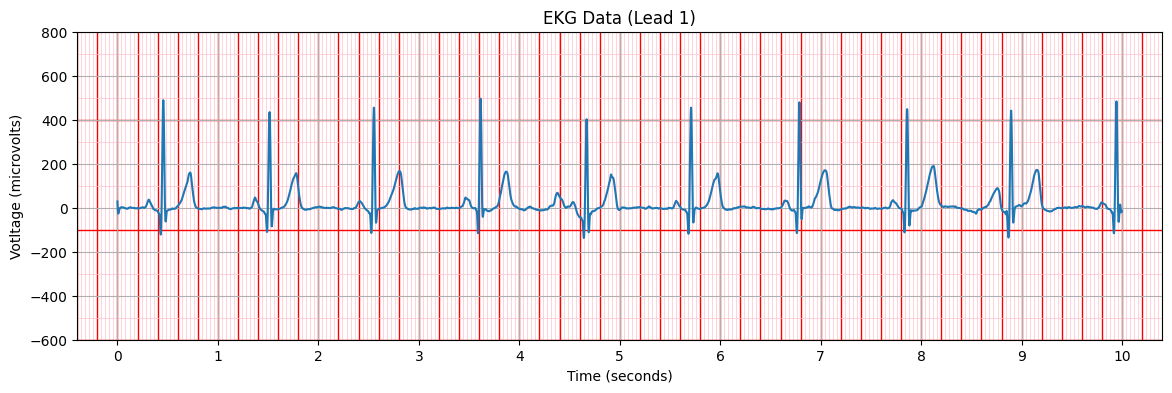

In [9]:
# Select the data from the first row (iloc[0])
first_row_data = ekg_df['lead 1 lists'].iloc[0]

# -------- Graph X -Tick Calculations -------- 
# --- Goal to make consistent with ECG paper ---
SAMPLES_PER_SECOND = 500                         # Since the sampling rate is 500 readings per second
small_x_sec_tick = 500 * 0.04                    # ECG paper has small red ticks along x axis every 0.04 seconds (20 samples)
larger_x_sec_tick = small_x_sec_tick * 5         # ECG paper has a bit thicker red ticks along x axis every 0.2 seconds (100 samples)
                                                 # Five thicker red ticks equals 1 second (500 samples)
max_time = 10.4
min_time = -0.4

# -------- Graph Y-ticks calculations -------- 
# --- The ECGs in the datasets provided in the papers and the EKGs on Apple watches are measured in microvolts ---
# --- Most hosptial ECG are in millivolts not microvolts --- 
# --- Each y axis small tick is typically 0.1 millivolt which is equal to 100 microvolts ---
# --- Each y axis thicker tick is typically 0.5 millivolts which is equal to 500 microvolts ---
# --- These voltage perameters scales can be enhanced and changed but those are the typical scales on ecg paper ---

small_x_microvolt_tick = 100      # normal ECG paper lines would be 0.1 millivolt which is equal to 100 microvolts
larger_x_microvolt_tick = 500     # normal ECG paper lines would be 0.5 millivolt which is equal to 500 microvolts

max_microvolts = 800
min_microvolts = -600

# Create the new x-axis representing time in seconds
# It will go from 0 to 10 seconds ((5000 samples) / (500 samples/sec))
num_samples = len(first_row_data)
time_axis = np.arange(num_samples) / SAMPLES_PER_SECOND

# Create a single plot for the first row
plt.figure(figsize=(14, 4))

# Small lines every 0.04 seconds
x_small_ticks = np.arange(min_time, max_time + 0.2, 0.04)
for x_pos in x_small_ticks:
    plt.axvline(x=x_pos, color='pink', linestyle='-', linewidth=0.5, zorder=0)

# Thick lines every 0.2 seconds
x_thick_ticks = np.arange(min_time, max_time, 0.2) 
for x_pos in x_thick_ticks:
    plt.axvline(x=x_pos, color='red', linestyle='-', linewidth=1, zorder=0)

# Horizontal lines (Voltage)
# Pink lines every 0.1 mV / 100 microvolts
y_pink_ticks = np.arange(min_microvolts, max_microvolts, 100) 
for y_pos in y_pink_ticks:
    plt.axhline(y=y_pos, color='pink', linestyle='-', linewidth=0.5, zorder=0)

# Red lines every 0.5 mV (3x thicker)
y_red_ticks = np.arange(min_microvolts, max_microvolts, 500) 
for y_pos in y_red_ticks:
    plt.axhline(y=y_pos, color='red', linestyle='-', linewidth=1, zorder=0)

plt.plot(time_axis, first_row_data)


plt.title('EKG Data (Lead 1)')
plt.xlabel('Time (seconds)')
plt.ylabel('Votltage (microvolts)')
plt.xlim([min_time, max_time])
plt.ylim([min_microvolts, max_microvolts])
plt.xticks(np.arange(0,11,1))
plt.grid('both', 'both')
plt.show()


# Save the plot to a file
# Uncomment below to save 
#plt.savefig('first_row_ekg_plot.png')

# No Colored Line Format of Graphed EKGs Extracted from Lead 1

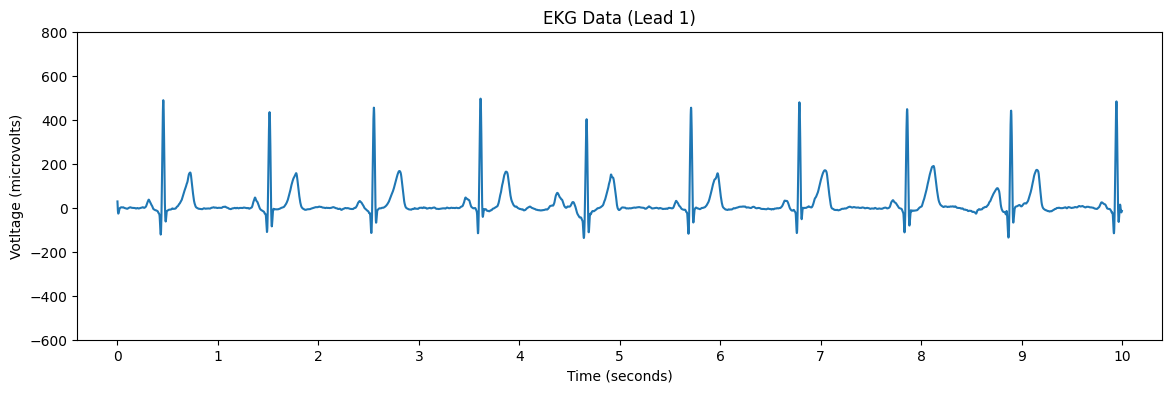

In [10]:
# Select the data from the first row (iloc[0])
first_row_data = ekg_df['lead 1 lists'].iloc[0]

# -------- Graph X -Tick Calculations -------- 
# --- Goal to make consistent with ECG paper ---
SAMPLES_PER_SECOND = 500                         # Since the sampling rate is 500 readings per second
max_time = 10.4
min_time = -0.4

max_microvolts = 800
min_microvolts = -600

# Create the new x-axis representing time in seconds
# It will go from 0 to 10 seconds ((5000 samples) / (500 samples/sec))
num_samples = len(first_row_data)
time_axis = np.arange(num_samples) / SAMPLES_PER_SECOND

# Create a single plot for the first row
plt.figure(figsize=(14, 4))

plt.plot(time_axis, first_row_data)
plt.title('EKG Data (Lead 1)')
plt.xlabel('Time (seconds)')
plt.ylabel('Votltage (microvolts)')
plt.xlim([min_time, max_time])
plt.ylim([min_microvolts, max_microvolts])
plt.xticks(np.arange(0,11,1))
plt.show()
# Save the plot to a file
#plt.savefig('first_row_ekg_plot.png')

# Plot Each **Colored** Line Lead 1 Reading and Save Each as PNG File
**Uncomment to run cell, but you will make a lot of files**

In [ ]:

# # 1. Define the directory to save your images
# output_dir = 'ecg_images_dataset'
# os.makedirs(output_dir, exist_ok=True) # Create the directory if it doesn't exist

# # 2. Loop through every row in the DataFrame with a progress bar
# for i in tqdm(range(len(ekg_df)), desc="Generating EKG Images"):
    
#     # -------- Get Data for the Current Row --------
#     ekg_signal_data = ekg_df['lead 1 lists'].iloc[i]
#     file_name = ekg_df['file_name'].iloc[i]
#     rhythm = ekg_df['rhythm'].iloc[i]
    
#     # -------- Construct the Dynamic Filename --------
#     # Example: ekg_images/file_00001rhythmAFib.png
#     image_filename = f"{file_name}_rhythm_label_{rhythm}.png"
#     full_path = os.path.join(output_dir, image_filename)

#     # -------- Graphing Code (from your prompt) --------
#     # Constants
#     SAMPLES_PER_SECOND = 500
#     max_time = 10.4
#     min_time = -0.4
#     max_microvolts = 800
#     min_microvolts = -600

#     # Create the time axis
#     num_samples = len(ekg_signal_data)
#     time_axis = np.arange(num_samples) / SAMPLES_PER_SECOND

#     # Create the plot figure
#     fig = plt.figure(figsize=(14, 4))

#     # Draw grid lines
#     x_small_ticks = np.arange(min_time, max_time, 0.04)
#     for x_pos in x_small_ticks:
#         plt.axvline(x=x_pos, color='pink', linestyle='-', linewidth=0.5, zorder=0)
#     x_thick_ticks = np.arange(min_time, max_time, 0.2)
#     for x_pos in x_thick_ticks:
#         plt.axvline(x=x_pos, color='red', linestyle='-', linewidth=1, zorder=0)
#     y_pink_ticks = np.arange(min_microvolts, max_microvolts, 100)
#     for y_pos in y_pink_ticks:
#         plt.axhline(y=y_pos, color='pink', linestyle='-', linewidth=0.5, zorder=0)
#     y_red_ticks = np.arange(min_microvolts, max_microvolts, 500)
#     for y_pos in y_red_ticks:
#         plt.axhline(y=y_pos, color='red', linestyle='-', linewidth=1, zorder=0)

#     # Plot the EKG data
#     plt.plot(time_axis, ekg_signal_data, zorder=1)

#     # Set titles, labels, and limits
#     plt.title('EKG Data (Lead 1)')
#     plt.xlabel('Time (seconds)')
#     plt.ylabel('Voltage (microvolts)')
#     plt.xlim([min_time, max_time])
#     plt.ylim([min_microvolts, max_microvolts])
#     plt.xticks(np.arange(0, 11, 1))
#     plt.grid(False)

#     # 3. Save the figure and close it
#     plt.savefig(full_path)
#     plt.close(fig) # !!! Crucial: This closes the figure to free up memory!!

# print(f"\n Done! Saved {len(ekg_df)} images to the '{output_dir}' directory.")


# Plot Each **Non Colored** Lead 1 Reading and Save Each as PNG File
**Uncomment to run cell, but you will make a lot of files**

In [ ]:

# # 1. Define the directory to save your images
# output_dir = 'ecg_images_NoColor'
# os.makedirs(output_dir, exist_ok=True) # Create the directory if it doesn't exist

# # 2. Loop through every row in the DataFrame with a progress bar
# for i in tqdm(range(len(ekg_df)), desc="Generating EKG Images"):
    
#     # -------- Get Data for the Current Row --------
#     ekg_signal_data = ekg_df['lead 1 lists'].iloc[i]
#     file_name = ekg_df['file_name'].iloc[i]
#     rhythm = ekg_df['rhythm'].iloc[i]
    
#     # -------- Construct the Dynamic Filename --------
#     # Example: ekg_images/file_00001rhythmAFib.png
#     image_filename = f"{file_name}_rhythm_label_{rhythm}.png"
#     full_path = os.path.join(output_dir, image_filename)

#     # -------- Graphing Code (from your prompt) --------
#     # Constants
#     SAMPLES_PER_SECOND = 500
#     max_time = 10.4
#     min_time = -0.4
#     max_microvolts = 800
#     min_microvolts = -600

#     # Create the time axis
#     num_samples = len(ekg_signal_data)
#     time_axis = np.arange(num_samples) / SAMPLES_PER_SECOND

#     # Create the plot figure
#     fig = plt.figure(figsize=(14, 4))

#     # Plot the EKG data
#     plt.plot(time_axis, ekg_signal_data, zorder=1)

#     # Set titles, labels, and limits
#     plt.title('EKG Data (Lead 1)')
#     plt.xlabel('Time (seconds)')
#     plt.ylabel('Voltage (microvolts)')
#     plt.xlim([min_time, max_time])
#     plt.ylim([min_microvolts, max_microvolts])
#     plt.xticks(np.arange(0, 11, 1))
#     plt.grid(False)

#     # 3. Save the figure and close it
#     plt.savefig(full_path)
#     plt.close(fig) # !! Crucial: This closes the figure to free up memory!!

# print(f"\n Done! Saved {len(ekg_df)} images to the '{output_dir}' directory.")
